In [1]:
%matplotlib notebook
import datetime as dt
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
import serial
import numpy as np

In [2]:
ser = serial.Serial('COM4', 9600, timeout=1)

In [83]:
ser.close()

In [3]:
perimetro_rueda = 2.079

In [4]:
data_time = []
data_values = []
data_vel = []
data_vel_prom_3 = []

def procesador_promx(x):
    if(not len(data_values) > x):
        return
    velocidad_prom = sum(data_vel[-x:])/x
    data_vel_prom_3.append(velocidad_prom)
    graph(data_time[1:], data_vel, data_time[x:], data_vel_prom_3)
        
def procesador():
    if(not len(data_values) > 1):
        return
    delta_time = data_values[-1] - data_values[-2]
    if(delta_time < 100):
        #print("Corrupdata")
        pass
    velocidad = perimetro_rueda/delta_time*3600
    data_vel.append(velocidad)
    
    
    try:
        pass
    except:
        pass
    
    #print("Delta: {} ml - Velocidad {} K/h".format(delta_time, velocidad))

In [42]:
len(data_values)

553

In [74]:
while True:
    data = ser.readline()   # read a '\n' terminated line
    if(not len(data) > 2):
        continue
    data = int(data)        
    data_time.append(dt.datetime.now().strftime('%S.%f'))
    data_values.append(data)
    procesador()
    procesador_promx(10)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


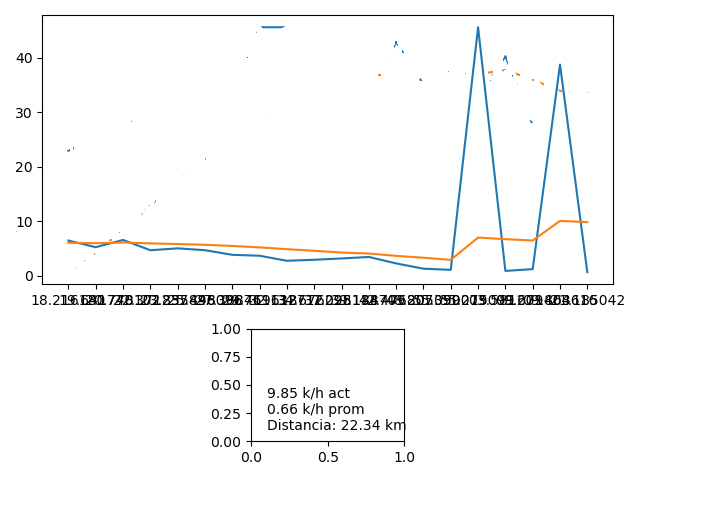

KeyboardInterrupt: 

In [31]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(nrows=3, ncols=3)
ax = fig.add_subplot(gs[0:2,:])
ax1 = fig.add_subplot(gs[2,1])
plt.ion()
plt.ylim(0,70)

fig.show()
fig.canvas.draw()


# This function is called periodically from FuncAnimation
def graph(xs, ys, xs1, ys1): 
    ax.clear()
    ax1.clear()
    ax.plot(xs[-20:], ys[-20:], label='')
    ax.plot(xs1[-20:], ys1[-20:], label='PROM')
    distancia = len(xs)*perimetro_rueda/1000
    prom = """{:.2f} k/h act\n{:.2f} k/h prom\nDistancia: {:.2f} km""".format(ys1[-1], ys[-1], distancia)
    pos = max(ys[-20:])/3
    
    ax1.text(0.1, 0.1, prom)
    fig.canvas.draw()


data_time = []
data_values = []
data_vel = []
data_vel_prom_3 = []
while True:
    data = ser.readline()   # read a '\n' terminated line
    if(not len(data) > 2):
        continue
    data = int(data)        
    data_time.append(dt.datetime.now().strftime('%S.%f'))
    data_values.append(data)
    procesador()
    procesador_promx(10)

'''data_values_cp = data_values[:]
data_time = []
data_values = []
data_vel = []
data_vel_prom_3 = []
for value in data_values_cp:
    data_time.append(dt.datetime.now().strftime('%S.%f'))
    data_values.append(value)
    procesador()
    procesador_promx(10)'''

In [28]:
data_values_cp = data_values[:]
data_time = []
data_values = []
data_vel = []
data_vel_prom_3 = []
for value in data_values_cp:
    data_time.append(dt.datetime.now().strftime('%S.%f'))
    data_values.append(value)
    procesador()
    procesador_promx(10)

In [37]:
import pandas as pd
data = {
    'data_time': data_time,
    'data_values': data_values,
    'data_vel': data_vel,
    'data_vel_prom_3': data_vel_prom_3
}
df = pd.DataFrame.from_dict(data, orient='index')
df.to_csv('29-03-20.csv')

In [38]:
print(df)

                     0          1          2          3          4      \
data_time        26.477861  27.319914  28.332996  29.138061  29.692106   
data_values        2366134    2366977    2367989    2368795    2369349   
data_vel           8.87829    7.39565    9.28586    13.5097    17.7355   
data_vel_prom_3    15.9146    17.2543    18.6593     19.863    20.7869   

                     5          6          7          8          9      ...  \
data_time        30.113141  30.521175  30.869202  31.233232  31.603261  ...   
data_values        2369771    2370179    2370527    2370892    2371262  ...   
data_vel           18.3441    21.5069    20.5052    20.2281     21.757  ...   
data_vel_prom_3    21.2883    21.6423    21.9781    22.3815    22.5928  ...   

                     10735      10736      10737      10738      10739  \
data_time        37.025134  39.188709  42.476807  48.205399  55.050079   
data_values        5258214    5260379    5263669    5269400    5276249   
data_vel   